In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
multifigs_size = (17,4)

In [ ]:
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 26.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
# Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
path =  "/content/drive/MyDrive/Colab Notebooks/"
os.chdir(path)
%pwd

Mounted at /content/drive


'/content/drive/MyDrive/Colab Notebooks'

# Dataset Overview

The data provided contains 12 columns and 918 rows. Here's a brief overview of each column:

*   Age: Age of the patient in years.
*   Sex: Gender of the patient; male or female.
*   ChestPainType: Type of chest pain experienced.
*   RestingBP: Resting blood pressure (in mm Hg on admission to the hospital).
*   Cholesterol: Cholesterol level(Serum cholesterol in mg/dl).
*   FastingBS: Fasting blood sugar(Fasting blood sugar > 120 mg/dl).
*   RestingECG: Resting electrocardiogram results.
*   MaxHR: Maximum heart rate achieved.
*   ExerciseAngina: Angina induced by exercise.
*   Oldpeak: ST depression induced by exercise relative to rest.
*   ST_Slope: The slope of the peak exercise ST segment.
*   HeartDisease: Presence of heart disease (0 for no, 1 for yes).














In [ ]:
original_df = pd.read_csv('heart.csv')
original_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Information of heart disease dataset:

In [ ]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


We can see that `Sex`, `ChestPainType`, `RestingECG`, `ExerciseAngina`,`ST_Slope`are categorical variables, but not `FastingBS`, `HeartDisease` let's print out its unique values:

---

In [ ]:
set(original_df['FastingBS'])
set(original_df['HeartDisease'])

{0, 1}

The values of `FastingBS` and `HeartDisease` are around from 0 to 1, certainly it's a categorical variable, so we'll convert it:

In [ ]:
original_df['FastingBS'] = original_df['FastingBS'].astype('object')
original_df['HeartDisease'] = original_df['HeartDisease'].astype('object')
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    object 
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 86.2+ KB


Next, let's find out more information about the numerical variables as `Age`, `RestingBP` in the below table:

In [ ]:
original_df.describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,136.809368,0.887364
std,9.432617,18.514154,109.384145,25.460334,1.066570
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


*   Age has a range from 28 to 77 years old.
*   RestingBP has the average is about 132.39 with a median value of
130.
- Cholesterol has the average is about 198.79 with a median value of
223.
- MaxHR has the average is about 136.80 with a median value of
138.
- Oldpeak has the average is about 0.88 with a median value of
0.6.



# Data Integration

# Data Cleaning

Clone a copy of the original dataset to keep it saparated.

In [ ]:
df = original_df.copy()

## Data Duplication

Firstly, we'll find whether the dataset has any duplication:

In [ ]:
dup_ind = df.duplicated()
df[dup_ind]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


There are no copies

## Missing Data

`Cholesterol` data was missing so decided to remove it:

In [ ]:
df = df[df['Cholesterol'] != 0]

In [ ]:
df.to_csv('updated_file.csv', index=False)

In [ ]:
# Đọc file CSV đã cập nhật
updated_df = pd.read_csv('updated_file.csv')

# Hiển thị toàn bộ dữ liệu
updated_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
741,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
742,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
743,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
744,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


Let's check the percent of missing data:

In [ ]:
df.isnull().sum()*100/df.shape[0]

Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64

So there's no missing data in the dataset, hence it's cleaned.

# Exploratory Data Analysis

The cleaned dataset has total of 746 observations, included:

*    Categorical variables: `Sex`, `ChestPainType`, `RestingECG`, `ExerciseAngina`, `ST_Slope`
*    Numerical variables: `Age`, `RestingBP`, `Cholesterol`, `FastingBS`, `MaxHR`, `Oldpeak`, `HeartDisease`

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 746 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             746 non-null    int64  
 1   Sex             746 non-null    object 
 2   ChestPainType   746 non-null    object 
 3   RestingBP       746 non-null    int64  
 4   Cholesterol     746 non-null    int64  
 5   FastingBS       746 non-null    object 
 6   RestingECG      746 non-null    object 
 7   MaxHR           746 non-null    int64  
 8   ExerciseAngina  746 non-null    object 
 9   Oldpeak         746 non-null    float64
 10  ST_Slope        746 non-null    object 
 11  HeartDisease    746 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 75.8+ KB


To visualize the numerical variables, we'll turn them into categorical variables.

First, for `age`, accroding from [Age Categories, Life Cycle Groupings](https://www.statcan.gc.ca/eng/concepts/definitions/age2), we'll consider a `age_groups` below:
*    Children: below 15
*    Youth: from 15 - 24
*    Adult: from 25 - 64
*    Senior: above 64

In [ ]:
def categorize_age(row):
  if row["Age"] < 15:
    label = "Children"
  elif row["Age"] < 24:
    label = "Youth"
  elif row["Age"] < 64:
    label = "Adult"
  else:
    label = "Senior"
  return label
df['age_groups'] = df.apply(categorize_age, axis=1)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,age_groups
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,Adult
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,Adult
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,Adult
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,Adult
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,Adult


Then, for `MaxHR`, accroding [About MaxHR](https://www.bidvmetlife.com.vn/vn/for-customers/navigating-happiness-together/move-happy/cong-thuc-tinh-thoi-luong-va-cuong-do-luyen-tap-theo-the-trang/), we'll consider a `chest_pain_type_groups` below:

In [ ]:
def categorize_maxhr_by_age(row):
    age = row["Age"]
    max_hr = row["MaxHR"]

    # Đối chiếu với các nhóm tuổi và ngưỡng MaxHR tương ứng
    if age < 15:  # Children
        return "Children: High" if max_hr >= 206 else "Children: Normal"
    elif 15 <= age <= 24:  # Youth
        return "Youth: High" if max_hr >= 196 else "Youth: Normal"
    elif 24 < age < 65:  # Adult
        # Giả sử giảm ngưỡng MaxHR cho người lớn
        return "Adult: Normal" if max_hr >= 155 and max_hr <= 195 else "Adult: Non-Normal"
    else:  # Senior
        # Ngưỡng thấp hơn cho nhóm Senior
        return "Senior: Normal" if max_hr >= 120 and max_hr <= 155 else "Senior: Non-Normal"

# Áp dụng hàm phân loại
df['maxhr_category'] = df.apply(categorize_maxhr_by_age, axis=1)

# Hiển thị kết quả
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,age_groups,maxhr_category
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,Adult,Adult: Normal
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,Adult,Adult: Normal
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,Adult,Adult: Non-Normal
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,Adult,Adult: Non-Normal
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,Adult,Adult: Non-Normal


Then, for `Resting blood pressure`, accroding [About resting blood pressure](https://www.nhathuocankhang.com/ban-tin-suc-khoe/huong-dan-cach-doc-chi-so-huyet-ap-tren-may-do-1510852), we'll consider a `trestbps_groups` below:

*    Serious high: Trestbps $>$ 180
*    Relatively high: 140 $\leq$ Trestbps $<$ 180
*    Stightly tall: 130 $\leq$ Trestbps $<$ 140
*    Normal: 120 $\leq$ Trestbps $<$ 130
*    Optimal: Trestbps $\leq$ 120

---



In [ ]:
def categorize_trestbps(row):
  if row["RestingBP"] > 180:
    label = "Serious high"
  elif row["RestingBP"] < 180 and row["RestingBP"] > 140:
    label = "Relatively high"
  elif row["RestingBP"] < 140 and row["RestingBP"] > 130:
    label = "Slightly tall"
  elif row["RestingBP"] < 130 and row["RestingBP"] > 120:
    label = "Normal"
  else:
    label = "Optimal"
  return label

df['trestbps_groups'] = df.apply(categorize_trestbps, axis=1)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,age_groups,maxhr_category,trestbps_groups
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,Adult,Adult: Normal,Optimal
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,Adult,Adult: Normal,Relatively high
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,Adult,Adult: Non-Normal,Optimal
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,Adult,Adult: Non-Normal,Slightly tall
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,Adult,Adult: Non-Normal,Relatively high


Then, for `Cholesterol`, accroding [About Cholesterol](https://medlatec.vn/tin-tuc/chi-so-mo-mau-bao-nhieu-la-dang-lo-ngai-), we'll consider a `chol_groups` below:

*    Very high: Cholesterol $>$ 240
*    High: 200 $\leq$ Cholesterol $<$ 240
*    Normal: Cholesterol $\leq$ 200

---



In [ ]:
def categorize_chol(row):
  if row["Cholesterol"] > 240:
    label = "Very high"
  elif row["Cholesterol"] < 240 and row["Cholesterol"] > 200:
    label = "High"
  else:
    label = "Normal"
  return label

df['chol_groups'] = df.apply(categorize_chol, axis=1)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,age_groups,maxhr_category,trestbps_groups,chol_groups
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,Adult,Adult: Normal,Optimal,Very high
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,Adult,Adult: Normal,Relatively high,Normal
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,Adult,Adult: Non-Normal,Optimal,Very high
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,Adult,Adult: Non-Normal,Slightly tall,High
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,Adult,Adult: Non-Normal,Relatively high,Normal


Then, for `Oldpeak`, accroding [About Oldpeak](https://medlatec.vn/tin-tuc/chi-so-mo-mau-bao-nhieu-la-dang-lo-ngai-), we'll consider a `chol_groups` below:
* Negative: Oldpeak < 0 (assuming good recovery)
* Low: Oldpeak from 0 to 1 (this threshold may vary depending on specific medical standards)
* Elevated: Oldpeak from 1 to 2
* High: Oldpeak from 2 to 3
* Very High: Oldpeak above 3


---



In [ ]:
def categorize_oldpeak(row):
    if row["Oldpeak"] < 0:
        return "Negative"
    elif 0 <= row["Oldpeak"] <= 1:
        return "Low"
    elif 1 < row["Oldpeak"] <= 2:
        return "Elevated"
    elif 2 < row["Oldpeak"] <= 3:
        return "High"
    else:  # row["Oldpeak"] > 3
        return "Very High"

# Áp dụng hàm lên DataFrame để tạo cột mới
df['oldpeak_groups'] = df.apply(categorize_oldpeak, axis=1)

# Hiển thị kết quả
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,age_groups,maxhr_category,trestbps_groups,chol_groups,oldpeak_groups
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,Adult,Adult: Normal,Optimal,Very high,Low
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,Adult,Adult: Normal,Relatively high,Normal,Low
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,Adult,Adult: Non-Normal,Optimal,Very high,Low
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,Adult,Adult: Non-Normal,Slightly tall,High,Elevated
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,Adult,Adult: Non-Normal,Relatively high,Normal,Low


## Prediction Variable

We'll plot distribution of `HeartDisease`:

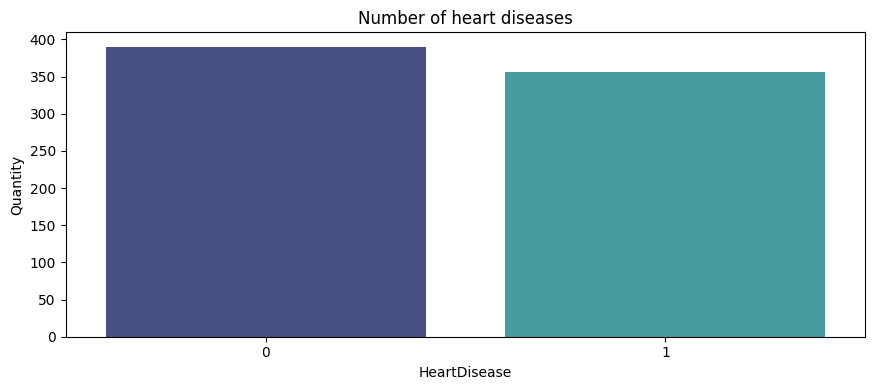

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=multifigs_size)

# Sử dụng sns.countplot để biểu diễn số lượng mắc hoặc không mắc bệnh
sns.countplot(x=df['HeartDisease'], ax=axs[0], palette='mako')

# Thêm tiêu đề cho countplot
axs[0].set_title('Number of heart diseases')

# Thêm nhãn cho trục x và trục y
axs[0].set_xlabel('HeartDisease')
axs[0].set_ylabel('Quantity')

# Điều chỉnh rotation cho các nhãn trục x nếu cần
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=0)

# Bỏ qua biểu đồ thứ hai (sns.boxplot) nếu bạn không sử dụng nó
axs[1].set_visible(False)  #ẩn axs[1] nếu bạn không muốn hiển thị nó.

plt.tight_layout()
plt.show()

As we can see, we can assume that there's no outliers in this dataset.

Next, let's analyze the categorical variables.

## Categorical Variables

Extract dataset with categorical variables for data visualizaion

In [ ]:
cat_df = df.select_dtypes(include="object").copy()
cat_df.head()

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease,age_groups,maxhr_category,trestbps_groups,chol_groups,oldpeak_groups
0,M,ATA,0,Normal,N,Up,0,Adult,Adult: Normal,Optimal,Very high,Low
1,F,NAP,0,Normal,N,Flat,1,Adult,Adult: Normal,Relatively high,Normal,Low
2,M,ATA,0,ST,N,Up,0,Adult,Adult: Non-Normal,Optimal,Very high,Low
3,F,ASY,0,Normal,Y,Flat,1,Adult,Adult: Non-Normal,Slightly tall,High,Elevated
4,M,NAP,0,Normal,N,Up,0,Adult,Adult: Non-Normal,Relatively high,Normal,Low


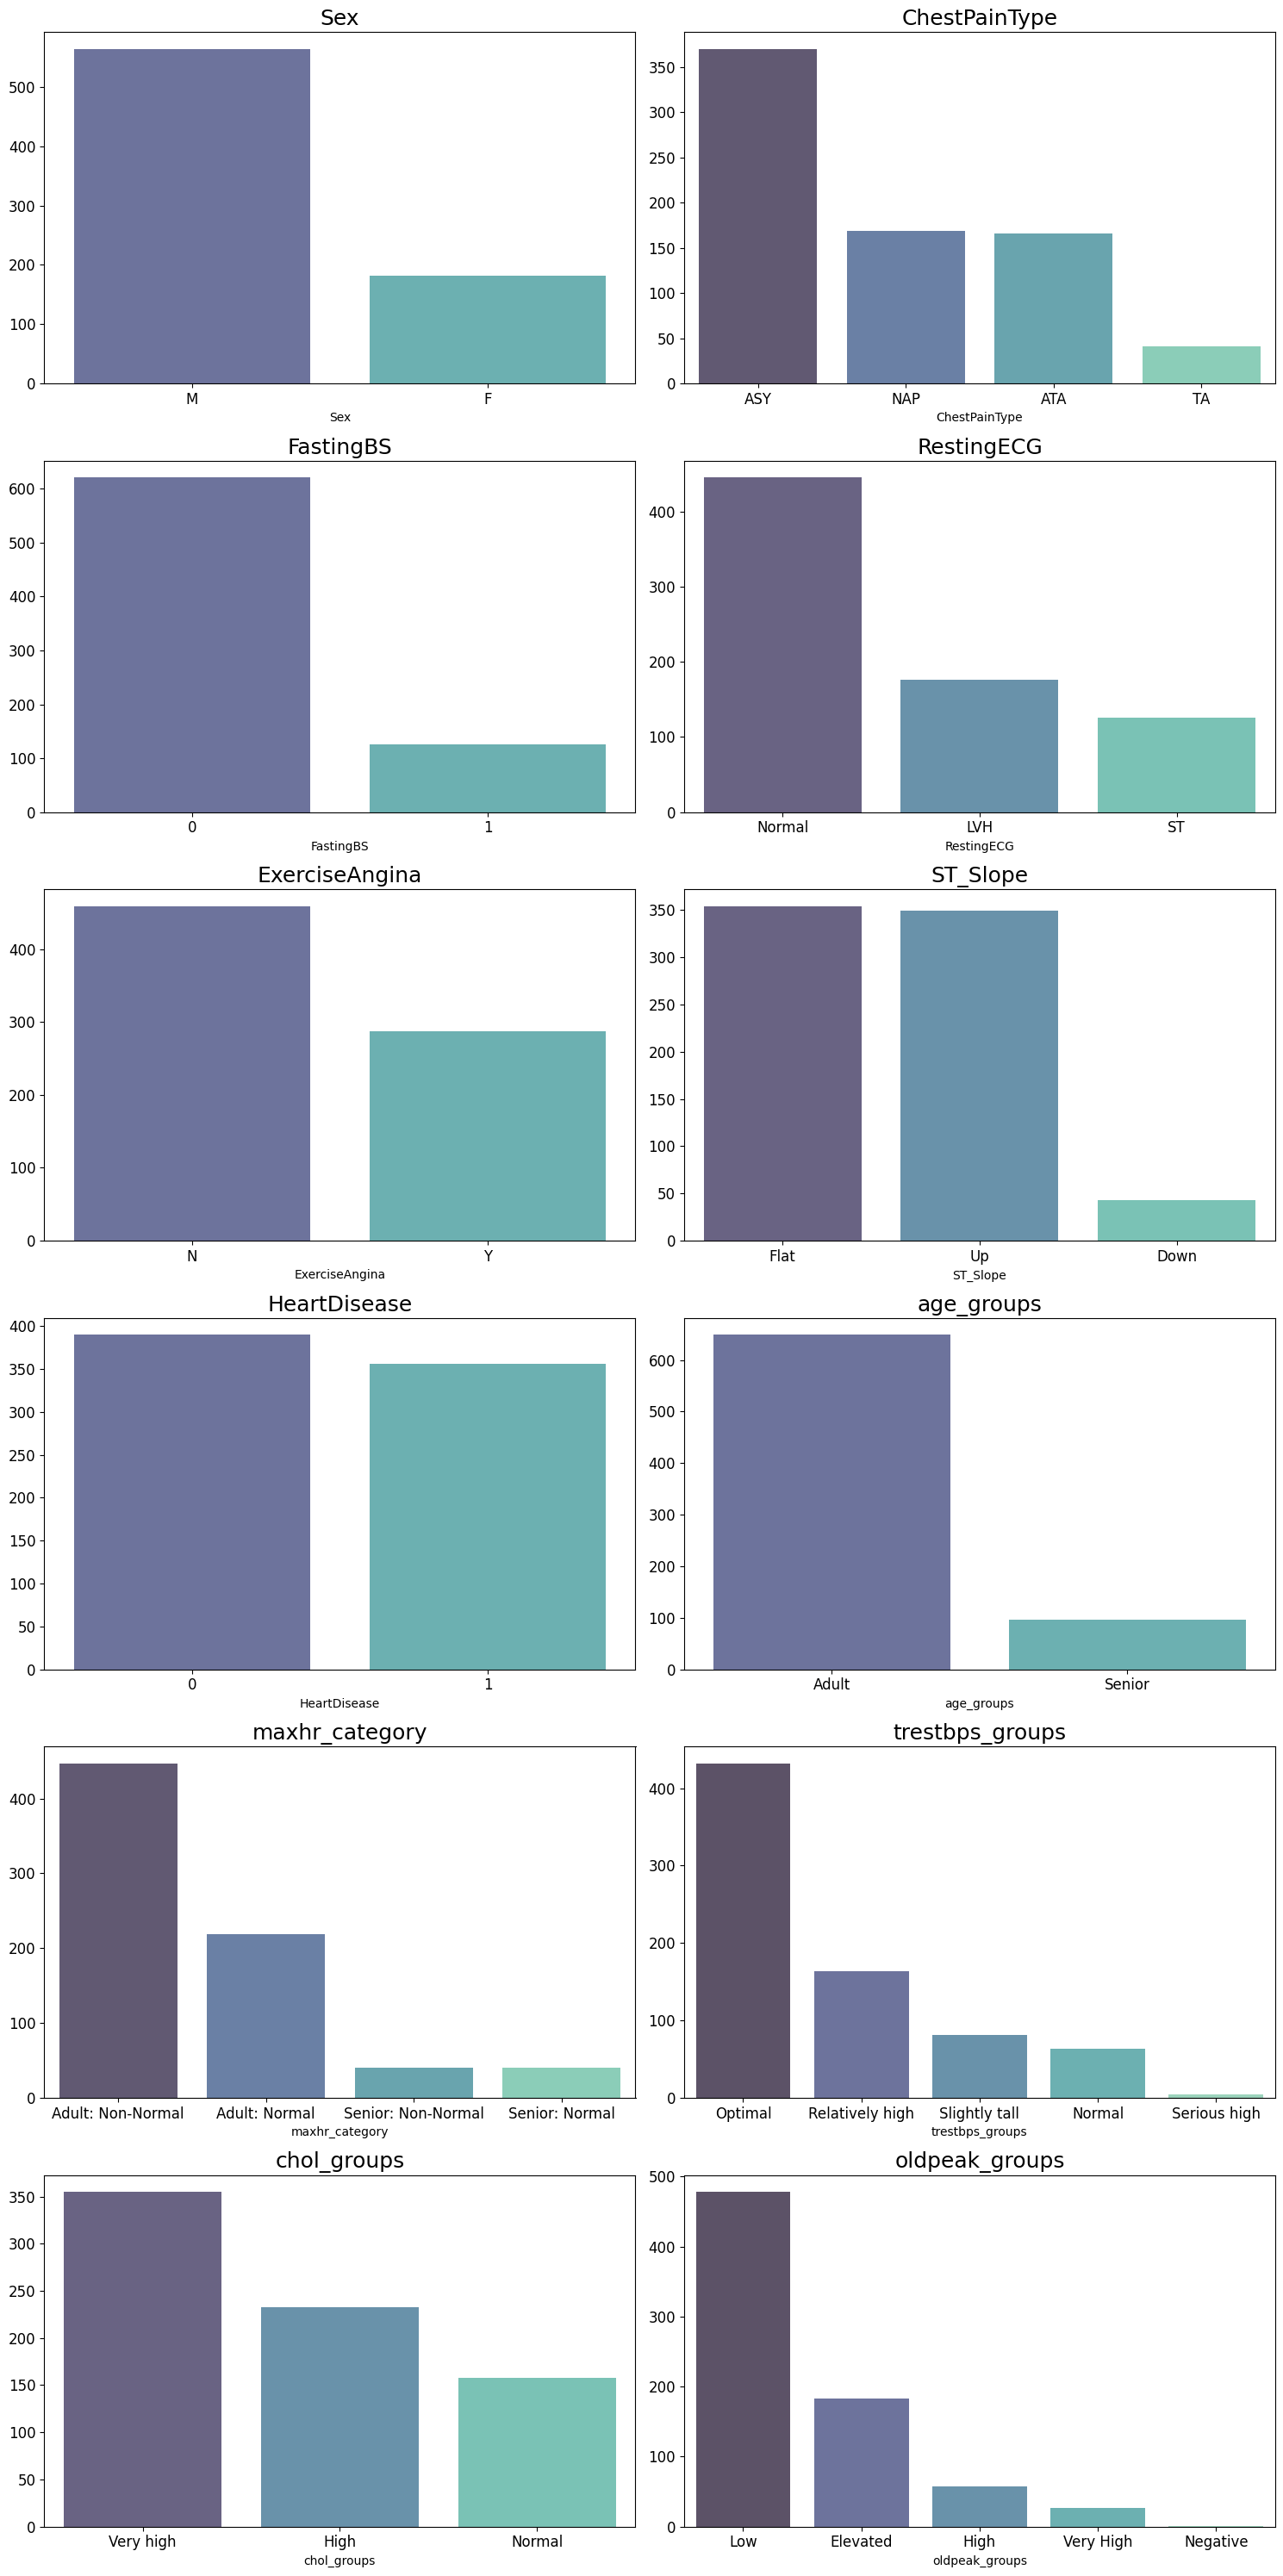

In [ ]:
# Số lượng biểu đồ cần vẽ
num_plot = len(cat_df.columns)

# Số cột và hàng trong subplot
num_cols = min(num_plot, 2)
num_rows = int(num_plot / num_cols) + (1 if num_plot % num_cols != 0 else 0)

# Đặt kích thước của hình ảnh. Bạn có thể chỉnh lại các con số tùy theo nhu cầu của bạn
figsize_width = 15
figsize_height = num_rows * 5

# Tạo bức tranh và các trục (axes)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(figsize_width, figsize_height))

# Điều chỉnh axes thành một list nếu nó không phải là một mảng
if not isinstance(axes, np.ndarray):
    list_axes = [axes]
else:
    list_axes = axes.flatten()

# Vẽ biểu đồ cho mỗi cột
for index, col in enumerate(cat_df.columns):
    df_count = df[col].value_counts()

    if (df_count.index.dtype == np.int64):
        df_count.index = df_count.index.astype(str)

    sns.barplot(ax=list_axes[index], x=df_count.index, y=df_count.values, alpha=0.8, palette='mako')
    list_axes[index].set_title(col, fontsize=18)
    list_axes[index].tick_params(axis="y", labelsize=12)
    list_axes[index].tick_params(axis="x", labelsize=12)

# Ẩn các axes không sử dụng
for i in range(num_plot, len(list_axes)):
    list_axes[i].set_visible(False)

# Chỉnh lại layout và hiển thị biểu đồ
fig.tight_layout()
plt.show()

Frequency of categorical variables:

In [ ]:
for col in cat_df.columns:
    # Calculate the counts of each category in the column
    temp_df = df[col].value_counts().rename_axis(col).reset_index(name='counts')
    # Calculate the frequency percentage of each category
    temp_df["frequency"] = round(temp_df["counts"] / len(df) * 100, 2)
    # Print the resulting DataFrame
    print(temp_df)

  Sex  counts  frequency
0   M     564       75.6
1   F     182       24.4
  ChestPainType  counts  frequency
0           ASY     370      49.60
1           NAP     169      22.65
2           ATA     166      22.25
3            TA      41       5.50
   FastingBS  counts  frequency
0          0     621      83.24
1          1     125      16.76
  RestingECG  counts  frequency
0     Normal     445      59.65
1        LVH     176      23.59
2         ST     125      16.76
  ExerciseAngina  counts  frequency
0              N     459      61.53
1              Y     287      38.47
  ST_Slope  counts  frequency
0     Flat     354      47.45
1       Up     349      46.78
2     Down      43       5.76
   HeartDisease  counts  frequency
0             0     390      52.28
1             1     356      47.72
  age_groups  counts  frequency
0      Adult     649       87.0
1     Senior      97       13.0
       maxhr_category  counts  frequency
0   Adult: Non-Normal     447      59.92
1       Adult: 

**Observations**:
- **Sex**: There's a significant discrepancy between the number of males `(M)` and females `(F)` in this dataset, with a predominant male presence (*75.6%* compared to *24.4%*). This could affect the analysis if heart disease correlates with gender.
- **ChestPainType**: The most common type of chest pain is `ASY (Asymptomatic)`, accounting for nearly half of the cases (*49.60%*). The remaining types, such as `NAP (Non-Anginal Pain)`, `ATA (Atypical Angina)`, and `TA (Typical Angina)`, are less frequent. The relationship between the type of chest pain and heart disease could be an important aspect to consider.
- **RestingECG Results**: A majority of participants have a normal ECG result (`Normal`), accounting for *59.65%*. This suggests that normal ECG outcomes are common.
- **Exercise-Induced Angina (ExerciseAngina)**: A large portion of participants does not experience chest pain during exercise (`N`), accounting for *61.53%*.
- **ST_Slope**: The main groups for the ST slope are `Flat` and `Up`, covering nearly the entire dataset (*47.45%* and *46.78%*, respectively). This highlights the necessity of considering the ST slope as a potential variable affecting heart disease.
- **Age Groups (age_groups)**: The majority of the study population are adults (`Adult`), making up *87%*, while seniors (`Senior`) constitute only *13%*. This may affect the ability to generalize the research findings across younger working populations or the elderly.
- **MaxHR Category (maxhr_category)**: `Adult: Non-Normal` is the prevailing category with *59.92%*, followed by `Adult: Normal` with *29.36%*. The categories `Senior: Non-Normal` and `Senior: Normal` have a relatively balanced representation with *5.36%* each.
- **Resting Blood Pressure Groups (trestbps_groups) and Cholesterol Groups (chol_groups)**: Both variables show a considerable distribution across various levels, from normal to very high, which could provide valuable insights into the relationship between blood pressure, cholesterol, and heart disease.
- **Oldpeak Groups**: The majority falls under `Low` (*64.08%*), followed by `Elevated` (*24.53%*). This data supports considering the Oldpeak level as a potential variable in predicting heart disease.


About age, from the fig below, the number of seniors in the is the lowest, but their sum and average of heart disease are the highest.

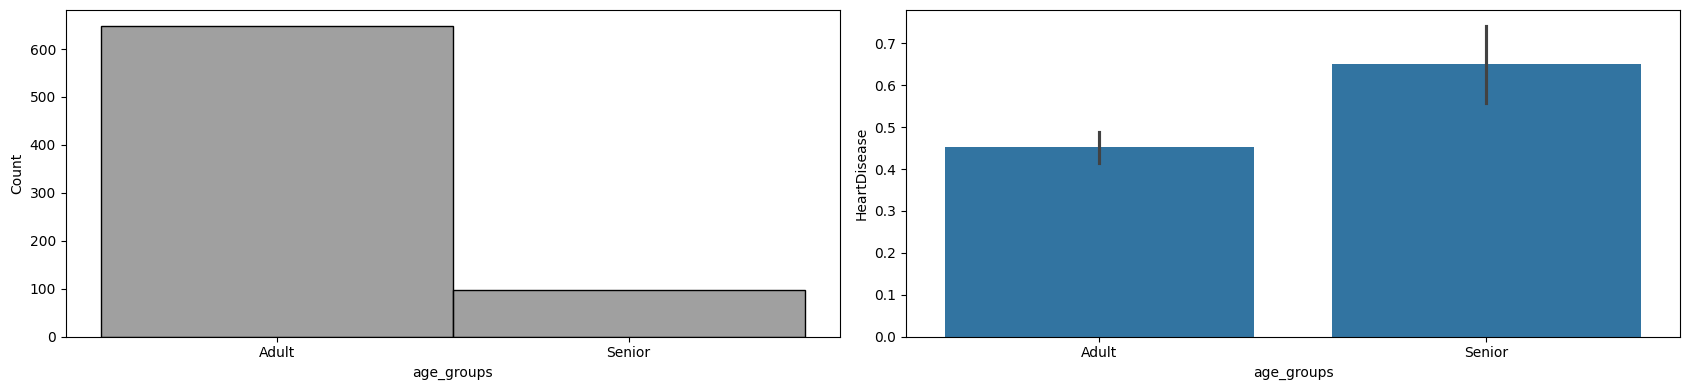

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=multifigs_size)
sns.histplot(x='age_groups', data=df, ax=axs[0], color='grey')
sns.barplot(x='age_groups', y='HeartDisease', data=df, ax=axs[1])
plt.tight_layout()

About `sex`, The male population is greater than the female population in both images below.

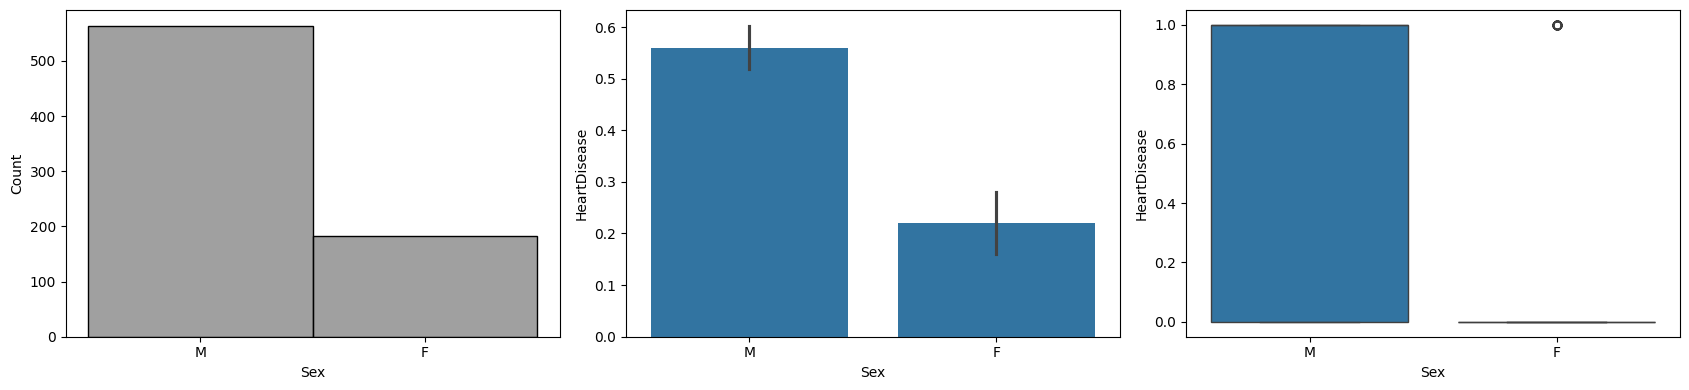

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=multifigs_size)
sns.histplot(x='Sex', data=df, ax=axs[0], color='grey')
sns.barplot(x='Sex', y='HeartDisease', data=df, ax=axs[1])
sns.boxplot(x='Sex', y='HeartDisease', data=df, ax=axs[2])
plt.tight_layout()

As we see, most people with heart disease have symptoms of ASY chest pain

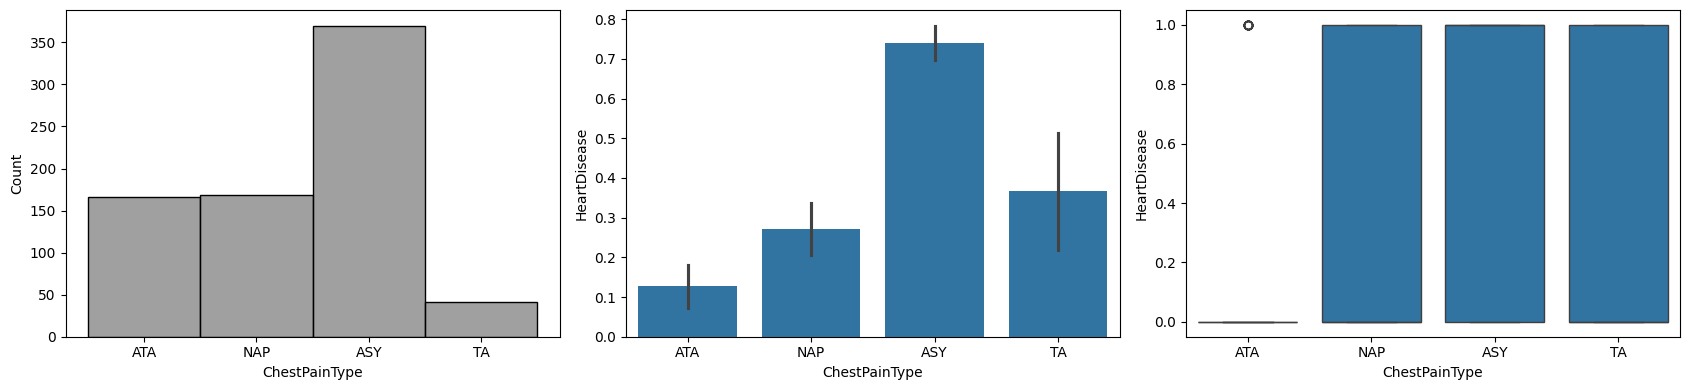

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=multifigs_size)
sns.histplot(x='ChestPainType', data=df, ax=axs[0], color='grey')
sns.barplot(x='ChestPainType', y='HeartDisease', data=df, ax=axs[1])
sns.boxplot(x='ChestPainType', y='HeartDisease', data=df, ax=axs[2])
plt.tight_layout()

Although the ECG index is normal, the rate of heart disease is still high

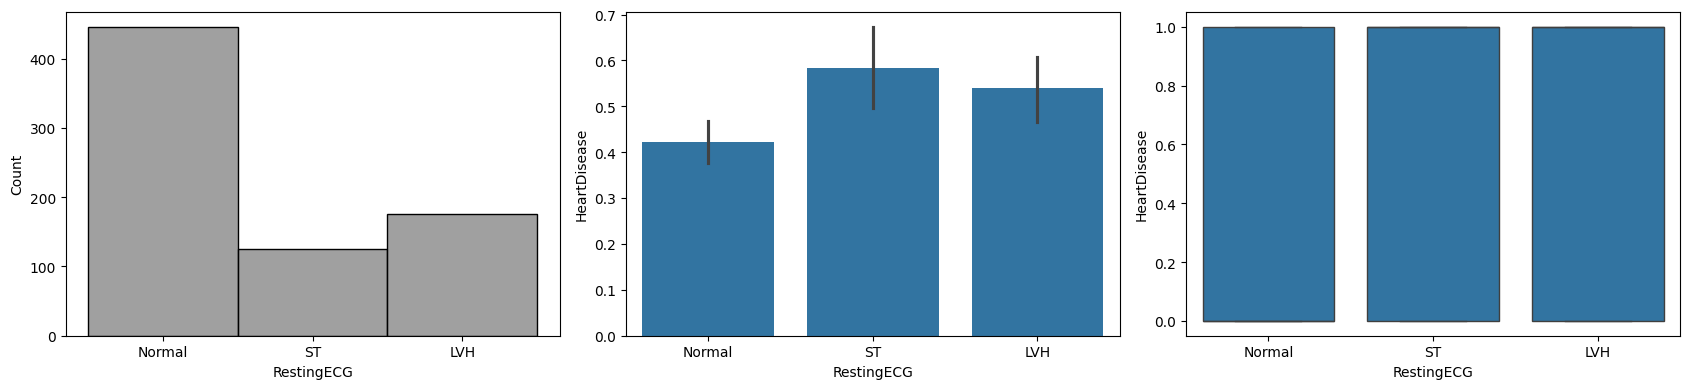

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=multifigs_size)
sns.histplot(x='RestingECG', data=df, ax=axs[0], color='grey')
sns.barplot(x='RestingECG', y='HeartDisease', data=df, ax=axs[1])
sns.boxplot(x='RestingECG', y='HeartDisease', data=df, ax=axs[2])
plt.tight_layout()

According to statistics, people with heart disease often have difficulty exercising

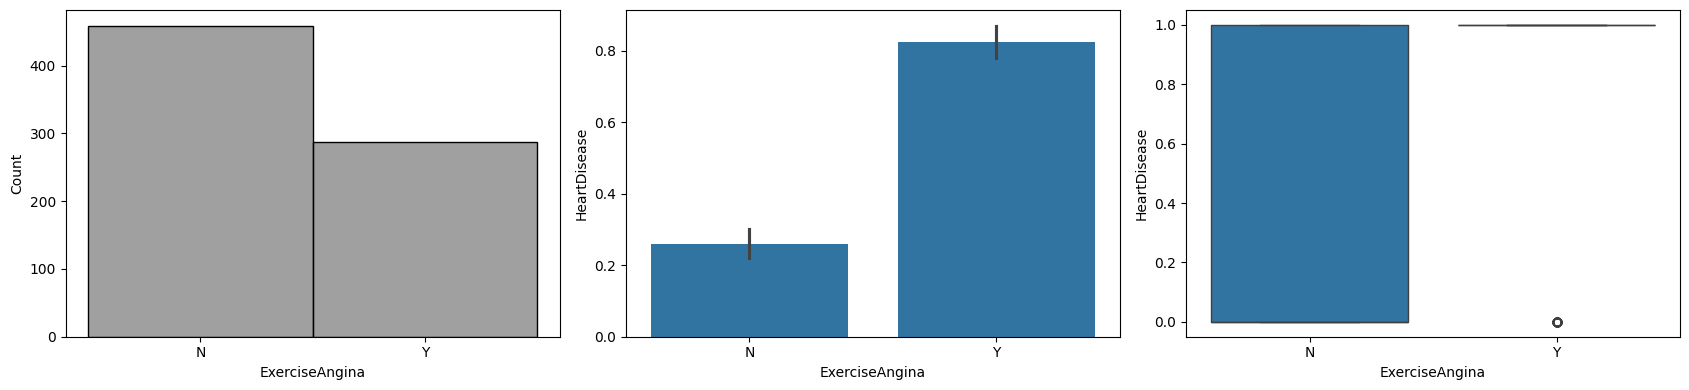

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=multifigs_size)
sns.histplot(x='ExerciseAngina', data=df, ax=axs[0], color='grey')
sns.barplot(x='ExerciseAngina', y='HeartDisease', data=df, ax=axs[1])
sns.boxplot(x='ExerciseAngina', y='HeartDisease', data=df, ax=axs[2])
plt.tight_layout()

Regarding the ST_Slop index, there is a clear difference

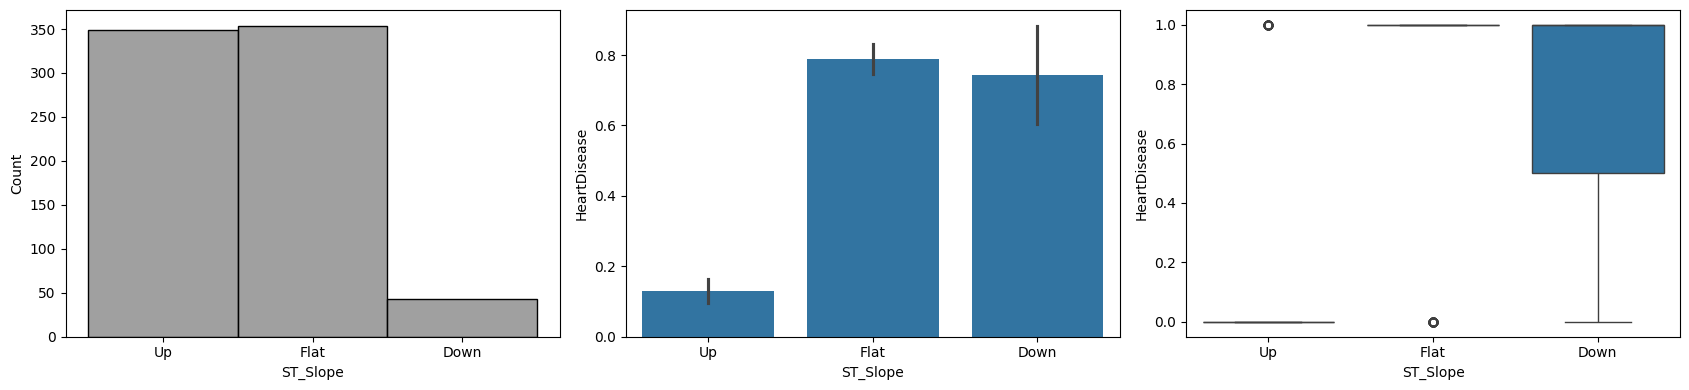

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=multifigs_size)
sns.histplot(x='ST_Slope', data=df, ax=axs[0], color='grey')
sns.barplot(x='ST_Slope', y='HeartDisease', data=df, ax=axs[1])
sns.boxplot(x='ST_Slope', y='HeartDisease', data=df, ax=axs[2])
plt.tight_layout()

Regarding the BP index, there is a difference in quantity but the results are quite uniform

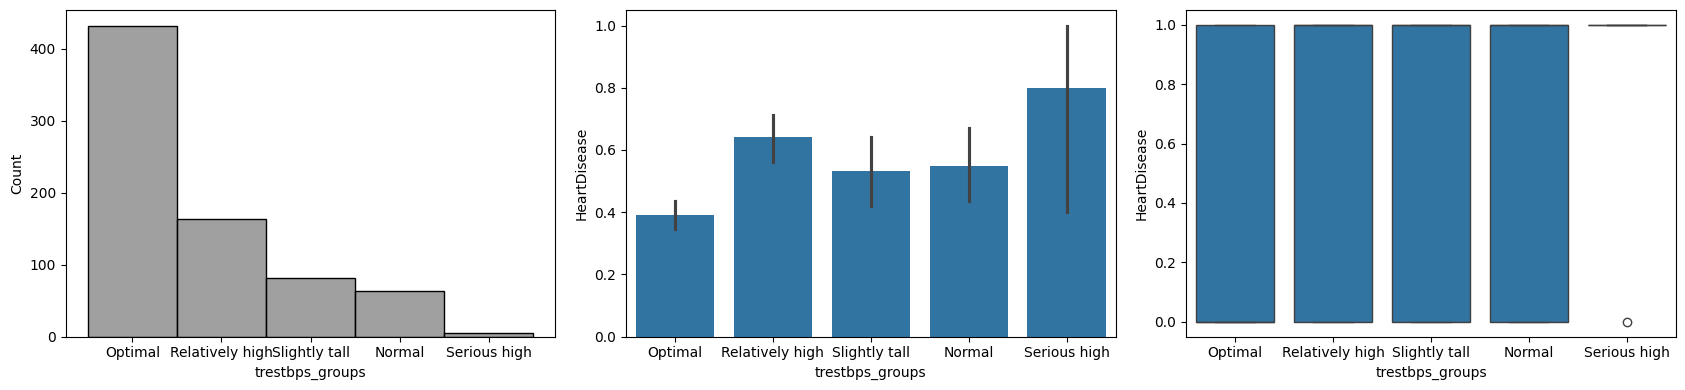

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=multifigs_size)
sns.histplot(x='trestbps_groups', data=df, ax=axs[0], color='grey')
sns.barplot(x='trestbps_groups', y='HeartDisease', data=df, ax=axs[1])
sns.boxplot(x='trestbps_groups', y='HeartDisease', data=df, ax=axs[2])
plt.tight_layout()

Regarding cholesterol, the indicators are quite uniform

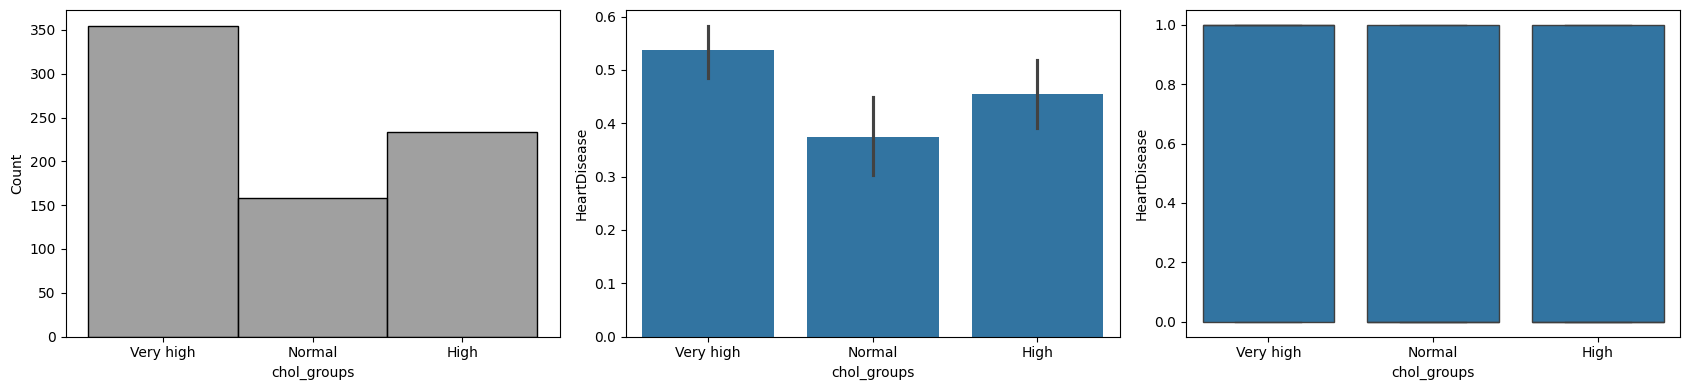

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=multifigs_size)
sns.histplot(x='chol_groups', data=df, ax=axs[0], color='grey')
sns.barplot(x='chol_groups', y='HeartDisease', data=df, ax=axs[1])
sns.boxplot(x='chol_groups', y='HeartDisease', data=df, ax=axs[2])
plt.tight_layout()

Regarding oldpeak, we see a clear difference

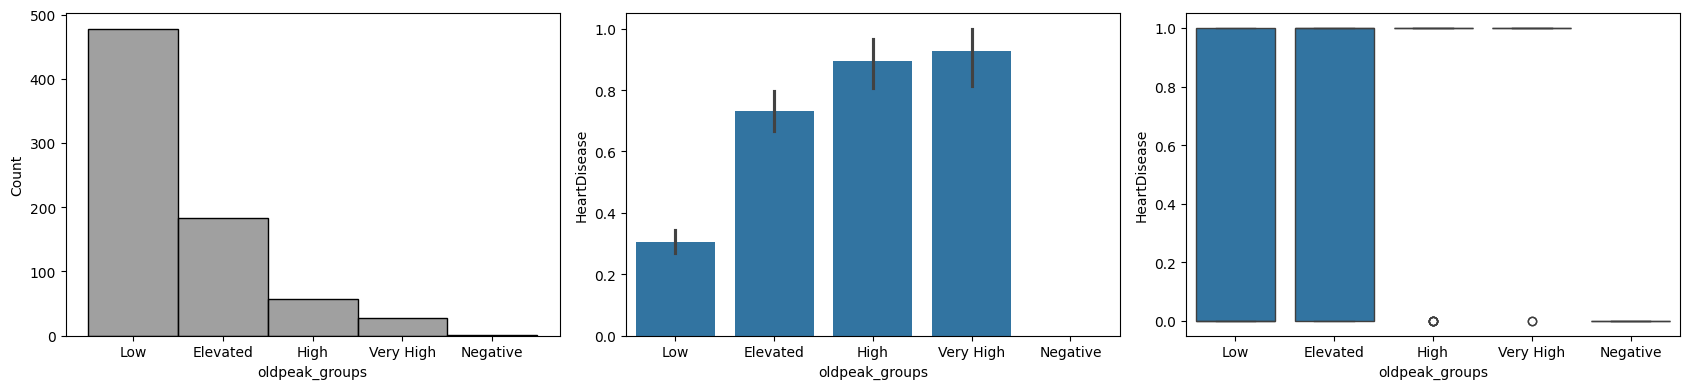

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=multifigs_size)
sns.histplot(x='oldpeak_groups', data=df, ax=axs[0], color='grey')
sns.barplot(x='oldpeak_groups', y='HeartDisease', data=df, ax=axs[1])
sns.boxplot(x='oldpeak_groups', y='HeartDisease', data=df, ax=axs[2])
plt.tight_layout()

## Data Visualization

### Correlation matrix

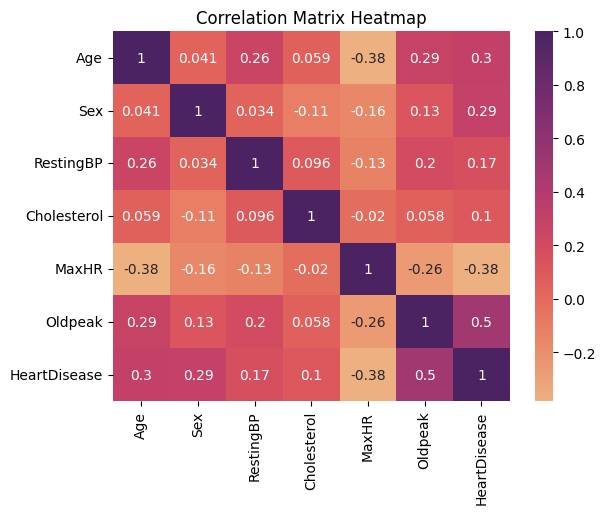

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Copy the original dataframe to transform
df_transform = df.copy()

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Assumption: 'Sex' and 'HeartDisease' are categorical variables that need encoding
df_transform['Sex'] = label_encoder.fit_transform(df_transform['Sex'])
df_transform['HeartDisease'] = label_encoder.fit_transform(df_transform['HeartDisease'])

# Compute the correlation matrix for numeric data types only
corr_matrix = df_transform.select_dtypes(include=['float64', 'int64']).corr()

# Create a heatmap to visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='flare')
plt.title('Correlation Matrix Heatmap')
plt.show()

###Variable `Age`, `Sex` with `Oldpeak`

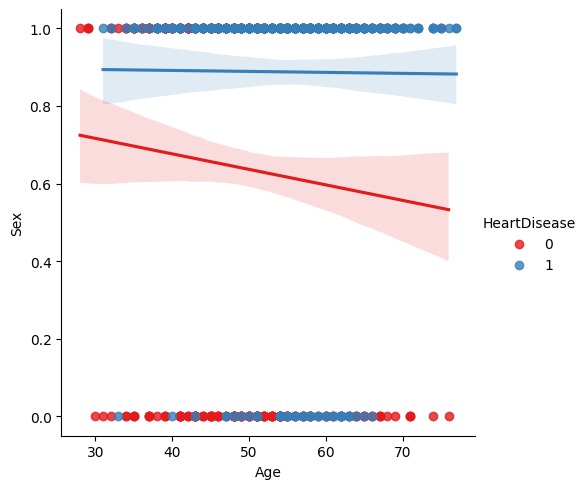

In [ ]:
# Using df_transform where 'Sex' has been converted to numeric values
sns.lmplot(x='Age', y='Sex', data=df_transform, hue='HeartDisease', palette='Set1')

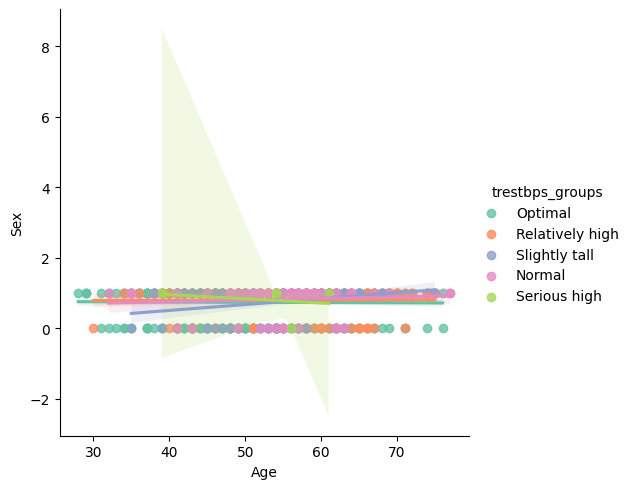

In [ ]:
sns.lmplot(x='Age', y='Sex', data=df_transform, hue='trestbps_groups', palette='Set2')

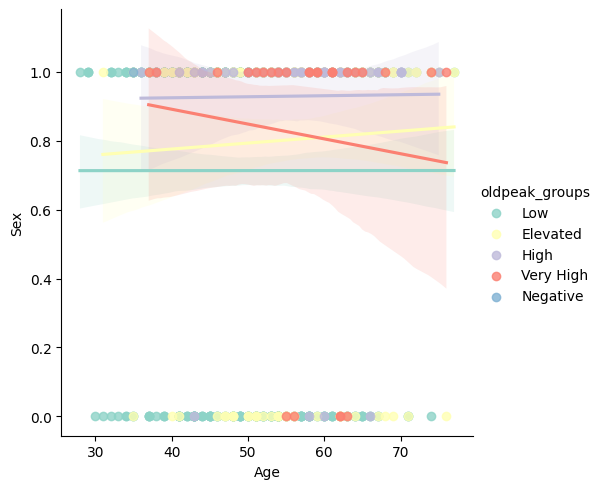

In [ ]:
sns.lmplot(x = 'Age', y = 'Sex', data=df_transform, hue='oldpeak_groups', palette='Set3')

<Axes: xlabel='age_groups', ylabel='Cholesterol'>

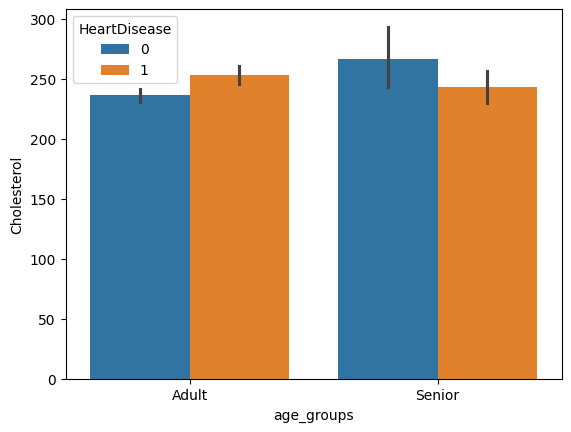

In [ ]:
sns.barplot(x='age_groups', y='Cholesterol', hue='HeartDisease', data=df)

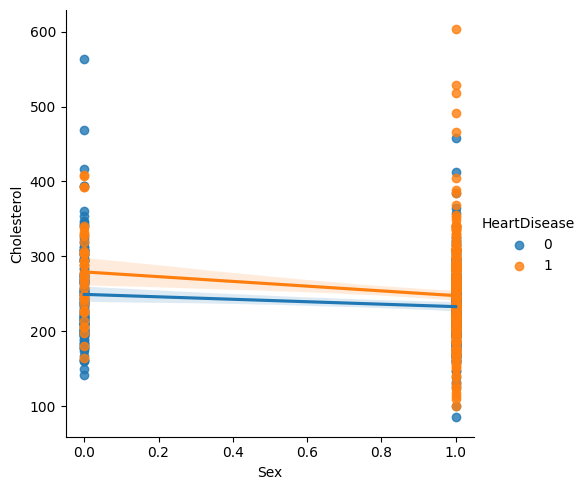

In [ ]:
sns.lmplot(x='Sex', y='Cholesterol', hue='HeartDisease',  data=df_transform)

###Variable Sex with HeartDisease

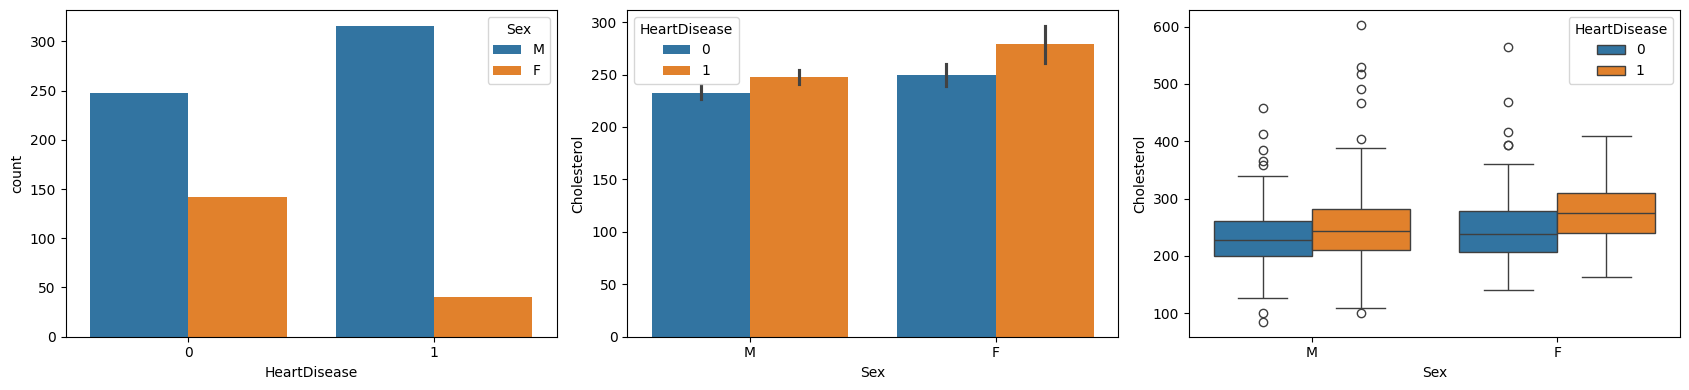

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=multifigs_size)
sns.countplot(x='HeartDisease', hue='Sex', data=df, ax=axs[0])
sns.barplot(x='Sex', y='Cholesterol', hue='HeartDisease', data=df, ax=axs[1])
sns.boxplot(x='Sex', y='Cholesterol', hue='HeartDisease', data=df, ax=axs[2])
plt.tight_layout()

### Variable `ST_Slope` with `Sex`, `HeartDisease`, `Cholesterol`

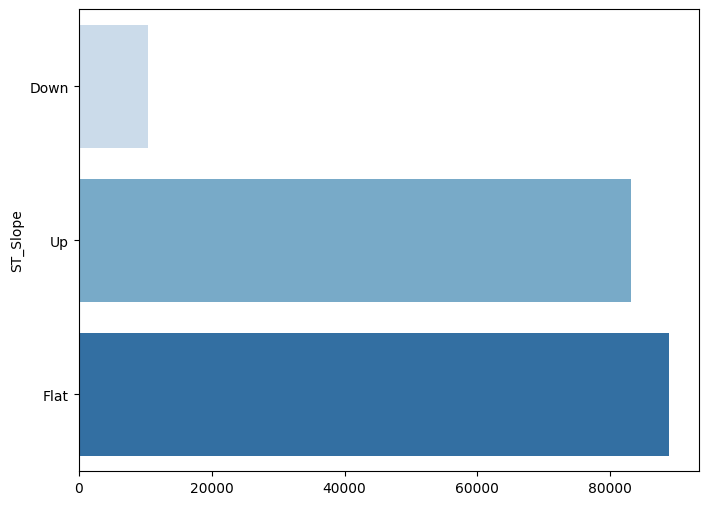

In [ ]:
onefig_size = (8, 6)
Cholesterol = df['Cholesterol'].groupby(df['ST_Slope']).sum().sort_values(ascending=True)

f, ax = plt.subplots(1, 1, figsize=onefig_size)
# When calling sns.barplot, specify the data for x and y using names or by referencing the Series directly
ax = sns.barplot(x=Cholesterol.values, y=Cholesterol.index, palette='Blues', orient='h')

plt.show()  # Display the plot

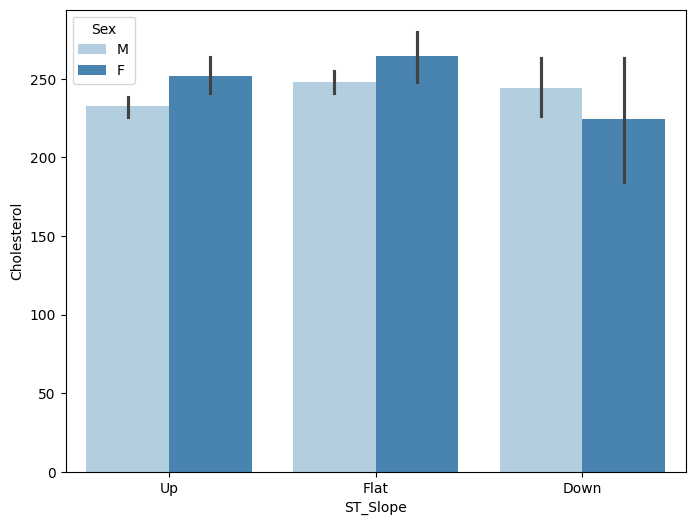

In [ ]:
f, ax = plt.subplots(1, 1, figsize=onefig_size)
ax = sns.barplot(x='ST_Slope', y='Cholesterol', hue='Sex', data=df, palette='Blues')

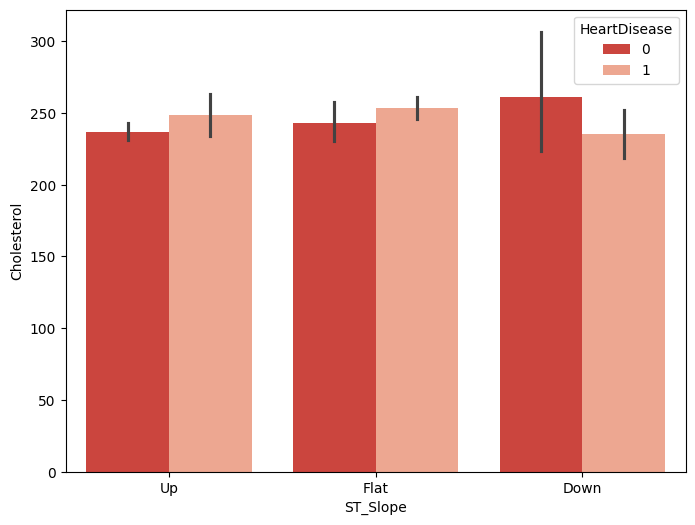

In [ ]:
f, ax = plt.subplots(1,1, figsize=onefig_size)
ax = sns.barplot(x='ST_Slope', y='Cholesterol', hue='HeartDisease', data=df, palette='Reds_r')

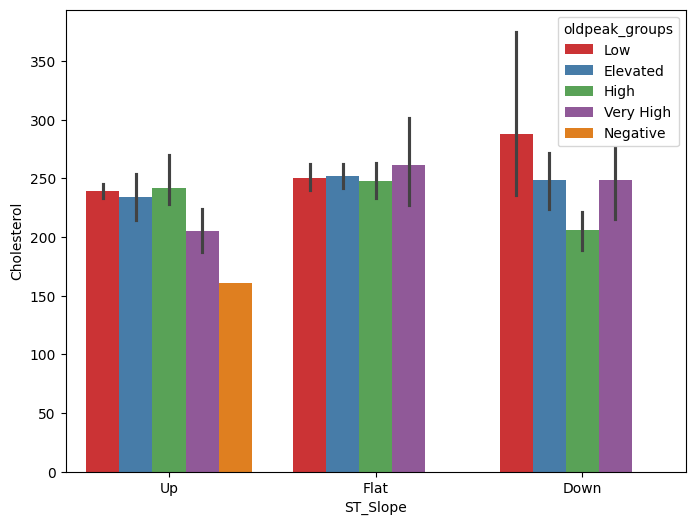

In [ ]:
f, ax = plt.subplots(1, 1, figsize=onefig_size)
ax = sns.barplot(x='ST_Slope', y='Cholesterol', hue='oldpeak_groups', data=df, palette='Set1')

### Variable `oldpeak_groups` with `HeartDisease`

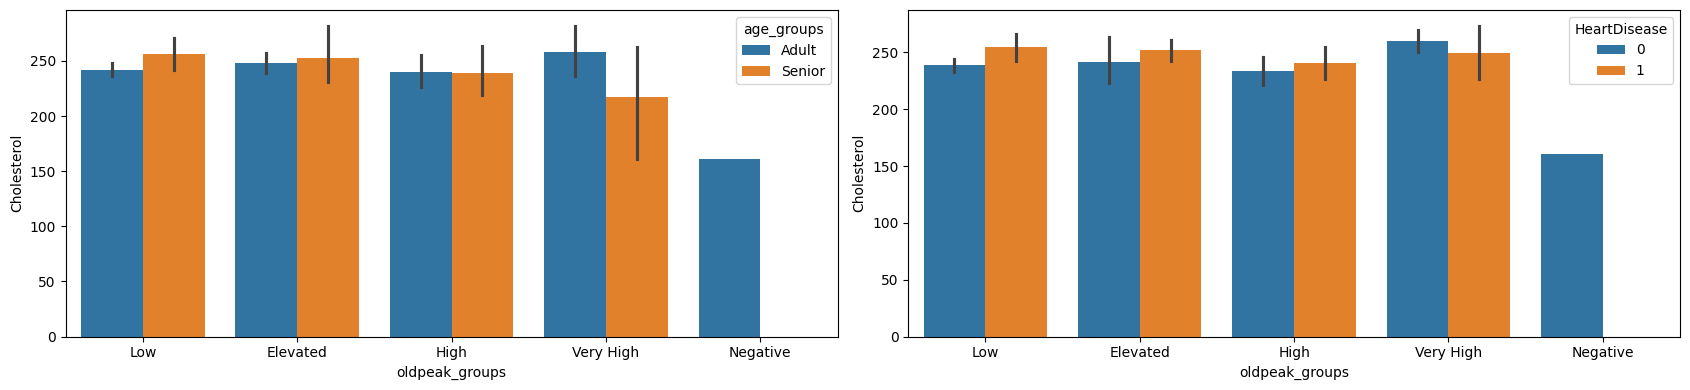

In [ ]:
f, axs = plt.subplots(ncols=2, figsize=multifigs_size)
ax = sns.barplot(x='oldpeak_groups', y='Cholesterol', data=df, hue='age_groups', ax=axs[0])
ax = sns.barplot(x='oldpeak_groups', y='Cholesterol', data=df, hue='HeartDisease', ax=axs[1])
plt.tight_layout()

# Feature Engineering

Depend on the EDA, we can create a feature called `health_groups` which included values:
* `Non-HeartDisease`: presents for group 1
* `HeartDisease HighChol`: presents for group 2
* `HeartDisease VeryHighChol`: presents for group 3

In [ ]:
df_fe = df.copy()

def categorize_health(row):
  if row["HeartDisease"] == 1 and row["chol_groups"] == "Very high":
    label = "HeartDisease VeryHighChol"
  elif row['HeartDisease'] == 1 and row["chol_groups"] == "High":
    label = "HeartDisease HighChol"
  elif row['HeartDisease'] == 1 and row["chol_groups"] == "Normal":
    label = "HeartDisease NormalChol"
  else:
    label = "Non-HeartDisease"
  return label

# Áp dụng hàm trên từng hàng của DataFrame và tạo cột mới 'health_groups'
df_fe['health_groups'] = df_fe.apply(categorize_health, axis=1)

# Hiển thị các hàng đầu tiên của DataFrame mới để kiểm tra kết quả
df_fe[['HeartDisease', 'chol_groups', 'health_groups']].head()

,HeartDisease,chol_groups,health_groups
0,0,Very high,Non-HeartDisease
1,1,Normal,HeartDisease NormalChol
2,0,Very high,Non-HeartDisease
3,1,High,HeartDisease HighChol
4,0,Normal,Non-HeartDisease


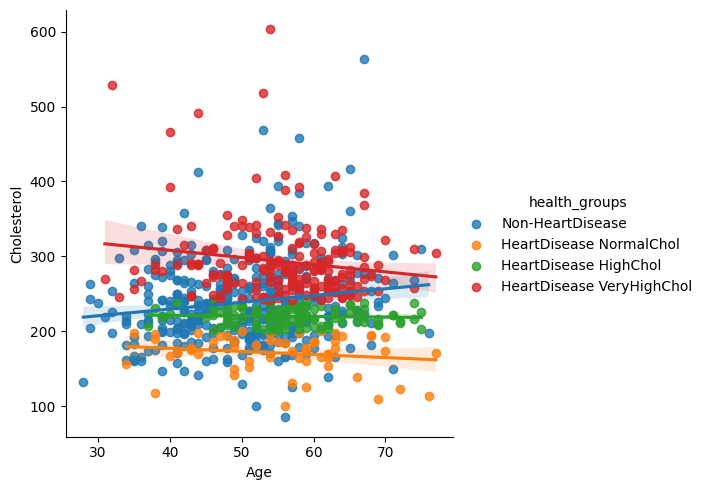

In [ ]:
sns.lmplot(x='Age', y='Cholesterol', hue='health_groups', data=df_fe)

<Axes: xlabel='Cholesterol', ylabel='Density'>

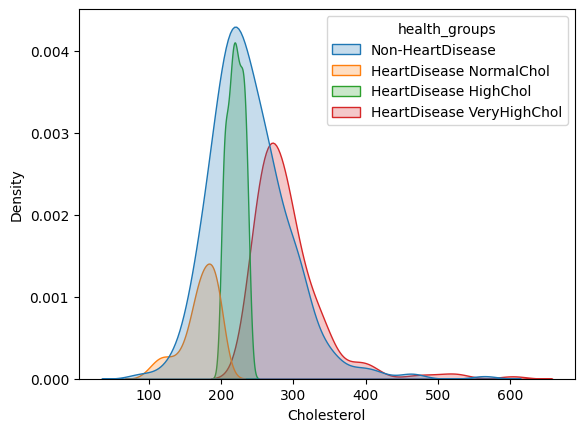

In [ ]:
sns.kdeplot(x='Cholesterol', hue='health_groups', data=df_fe, shade=True)

# Experiment



In [ ]:
# Danh sách các cột cần mã hóa
columns_to_encode = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'age_groups', 'maxhr_category', 'trestbps_groups', 'chol_groups', 'oldpeak_groups']

# Áp dụng Mã Hóa Một Nóng
df_encoded = pd.get_dummies(df, columns=columns_to_encode)

# Xem kết quả
print(df_encoded.head())

   Age  RestingBP  Cholesterol FastingBS  MaxHR  Oldpeak HeartDisease  Sex_F  \
0   40        140          289         0    172      0.0            0  False   
1   49        160          180         0    156      1.0            1   True   
2   37        130          283         0     98      0.0            0  False   
3   48        138          214         0    108      1.5            1   True   
4   54        150          195         0    122      0.0            0  False   

   Sex_M  ChestPainType_ASY  ...  trestbps_groups_Serious high  \
0   True              False  ...                         False   
1  False              False  ...                         False   
2   True              False  ...                         False   
3  False               True  ...                         False   
4   True              False  ...                         False   

   trestbps_groups_Slightly tall  chol_groups_High  chol_groups_Normal  \
0                          False             Fal

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Tạo LabelEncoder
le = LabelEncoder()

# Lặp qua mỗi cột và áp dụng LabelEncoder
for column in columns_to_encode:
    df[column] = le.fit_transform(df[column])

# Xem kết quả
print(df.head())

   Age  Sex  ChestPainType  RestingBP  Cholesterol FastingBS  RestingECG  \
0   40    1              1        140          289         0           1   
1   49    0              2        160          180         0           1   
2   37    1              1        130          283         0           2   
3   48    0              0        138          214         0           1   
4   54    1              2        150          195         0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope HeartDisease  age_groups  \
0    172               0      0.0         2            0           0   
1    156               0      1.0         1            1           0   
2     98               0      0.0         2            0           0   
3    108               1      1.5         1            1           0   
4    122               0      0.0         2            0           0   

   maxhr_category  trestbps_groups  chol_groups  oldpeak_groups  
0               1                1          

## Prepare Train Test Dataset

## Choose Models

Here we will be experimenting with 4 algorithms

- KNeighborsClassifier
- LogisticRegression
- LinearRegression
- DecisionTreeRegressor

In [ ]:
df.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,age_groups,maxhr_category,trestbps_groups,chol_groups,oldpeak_groups
0,40,1,1,140,289,0,1,172,0,0.0,2,0,0,1,1,2,2
1,49,0,2,160,180,0,1,156,0,1.0,1,1,0,1,2,1,2


In [ ]:
# split features and labels
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

Split train/test with ratio  8:2

In [ ]:
# split into training, testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((596, 16), (150, 16), (596,), (150,))

##Model Training

In [ ]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'LinearRegression' : LinearRegression(),
    'KNN': KNeighborsClassifier(),
    'DecisionTreeRegressor' : DecisionTreeRegressor(),

}

# create function to fit and score model
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evalute given machine learning models.
    models: a dictionary of different scikit learn machine learning models
    X_train: training date (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test : testing labels
    returns model scores dictionary.
    """

    # set random seed
    np.random.seed(42)

    # make dictonary to keep scores
    model_scores = {}

    # loop through models to fit and score
    for model_name, model in models.items():
        model.fit(X_train, y_train) # fit model
        score = model.score(X_test, y_test) # get score
        model_scores[model_name] = score # put score for each model

    return model_scores

In [ ]:
print(y.unique())  # Xem các giá trị duy nhất trong y
print(y.isnull().sum())  # Kiểm tra giá trị NaN
print(y_train.head()) # Xem vài giá trị đầu
print(y_train.unique()) # Kiểm tra các lớp duy nhất trong `y`
print(y_train.isnull().sum()) # Kiểm tra có giá trị NaN không

[0 1]
0
70     1
164    0
882    0
265    0
250    1
Name: HeartDisease, dtype: object
[1 0]
0


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Khởi tạo LabelEncoder
le = LabelEncoder()
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Áp dụng cho dữ liệu huấn luyện và kiểm tra
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)



In [ ]:
# fit and score
model_scores = fit_and_score(models, X_train, X_test, y_train_encoded, y_test_encoded)

model_scores

{'LogisticRegression': 0.8533333333333334,
 'LinearRegression': 0.5300024768879487,
 'KNN': 0.6133333333333333,
 'DecisionTreeRegressor': 0.35817436263148517}

In [ ]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])

model_compare.head()

,LogisticRegression,LinearRegression,KNN,DecisionTreeRegressor
accuracy,0.853333,0.530002,0.613333,0.358174


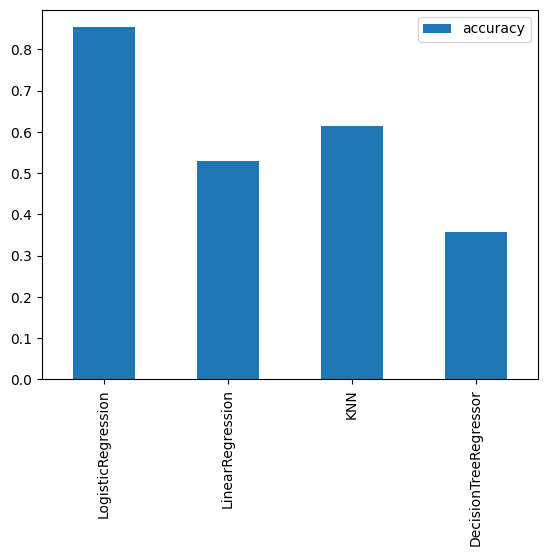

In [ ]:
model_compare.T.plot(kind='bar');

##Tuning or Improving our models

###Hyperparameter Tuning - using GridSearchCV

In [ ]:
# create hyperparameter grid for Logistic Regression
log_reg_grid = {
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear']
}

# set up grid hyperparameter search for Logistic Regression
gs_log_reg = GridSearchCV(LogisticRegression(),
                                          log_reg_grid,
                                          cv=5,
                                          verbose=True)

# train the model
gs_log_reg.fit(X_train, y_train_encoded)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [ ]:
# get best parameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [ ]:
# get the score
gs_log_reg.score(X_test, y_test_encoded)

0.84

## Evaluating Models


In [ ]:
# make predictions
y_preds = gs_log_reg.predict(X_test)

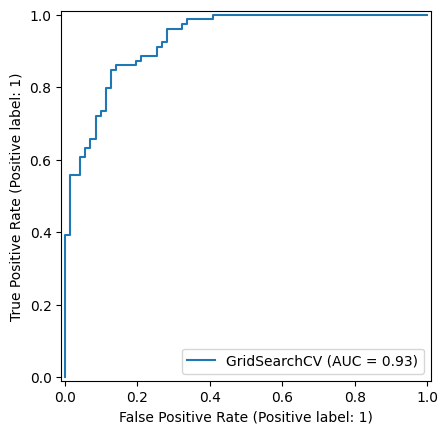

In [ ]:
# ROC curve and AUC
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test_encoded)
plt.show()

In [ ]:
confusion_matrix(y_test_encoded, y_preds)

array([[62,  9],
       [15, 64]])

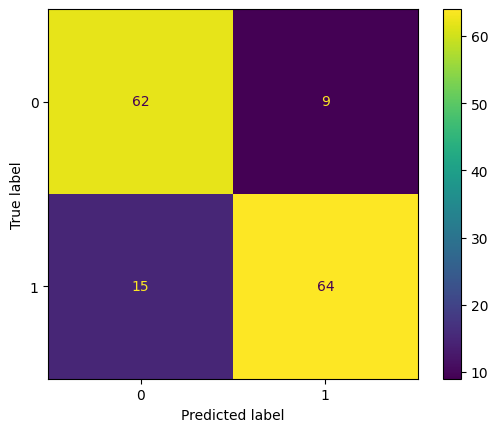

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test_encoded, y_preds)
plt.show()

In [ ]:
print(classification_report(y_test_encoded, y_preds))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        71
           1       0.88      0.81      0.84        79

    accuracy                           0.84       150
   macro avg       0.84      0.84      0.84       150
weighted avg       0.84      0.84      0.84       150



## Calculate evaluation metrics using Cross Validated Precision, Recall and F1 score

In [ ]:
# check current best parameter
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [ ]:
# create a new classifier with current best parameter
clf = LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [ ]:
# Cross Validated Accuracy
cv_accuracy = cross_val_score(clf, X, y_encoded, scoring='accuracy', cv=5)
cv_accuracy

array([0.83333333, 0.9261745 , 0.87248322, 0.77181208, 0.77181208])

In [ ]:
# mean of cross valided accuracy
cv_accuracy = np.mean(cv_accuracy)
cv_accuracy

0.8351230425055928

In [ ]:
# Cross Validated Precision
cv_precision = cross_val_score(clf, X, y_encoded, scoring='precision', cv=5)

cv_precision = np.mean(cv_precision)
cv_precision

0.829921183946141

In [ ]:
# Cross Validated Recall
cv_recall = cross_val_score(clf, X, y_encoded, scoring='recall', cv=5)

cv_recall = np.mean(cv_recall)
cv_recall

0.826056338028169

In [ ]:
# Cross Validated F1
cv_f1 = cross_val_score(clf, X, y_encoded, scoring='f1', cv=5)

cv_f1 = np.mean(cv_f1)
cv_f1

0.8245713039461149

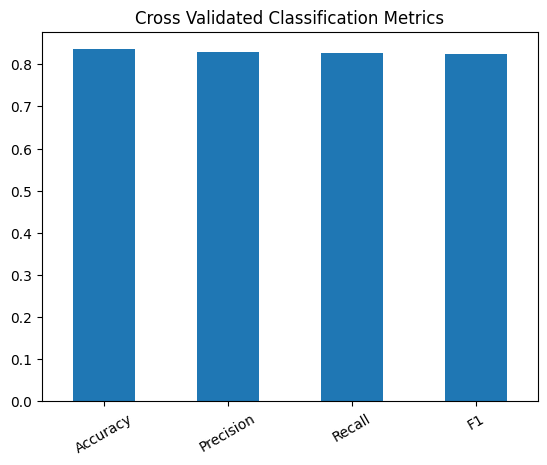

In [ ]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({'Accuracy': cv_accuracy,
                                            'Precision': cv_precision,
                                            'Recall': cv_recall,
                                            'F1': cv_f1},
                                             index=[0])

cv_metrics.T.plot.bar(legend=False);

plt.title('Cross Validated Classification Metrics')
plt.xticks(rotation=30);

# Results

In [ ]:
model = LogisticRegression(C=0.23357214690901212, solver='liblinear')
model.fit(X_train, y_train_encoded)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [ ]:
# check Coefficient of features
model.coef_

array([[ 2.71799751e-02,  1.02459025e+00, -6.59435728e-01,
         9.77165314e-03, -1.31844087e-03,  1.21232826e-01,
        -2.76246322e-01, -1.05357383e-02,  9.94813639e-01,
         3.46029744e-01, -1.40960354e+00, -1.27005851e-01,
         5.52866754e-02,  9.99060153e-02,  2.16789368e-01,
        -9.24933722e-02]])

In [ ]:
df.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,age_groups,maxhr_category,trestbps_groups,chol_groups,oldpeak_groups
0,40,1,1,140,289,0,1,172,0,0.0,2,0,0,1,1,2,2
1,49,0,2,160,180,0,1,156,0,1.0,1,1,0,1,2,1,2


In [ ]:
# Match coef's of features to columns name
feature_dict = dict(zip(df.columns, list(model.coef_[0])))

feature_dict

{'Age': 0.02717997513952339,
 'Sex': 1.0245902529405864,
 'ChestPainType': -0.6594357283293202,
 'RestingBP': 0.00977165313632767,
 'Cholesterol': -0.0013184408701048748,
 'FastingBS': 0.12123282592277396,
 'RestingECG': -0.2762463216014162,
 'MaxHR': -0.010535738258908,
 'ExerciseAngina': 0.9948136393845787,
 'Oldpeak': 0.34602974389192664,
 'ST_Slope': -1.4096035396652205,
 'HeartDisease': -0.1270058510640475,
 'age_groups': 0.05528667535598961,
 'maxhr_category': 0.09990601530780756,
 'trestbps_groups': 0.2167893678514944,
 'chol_groups': -0.09249337217434005}

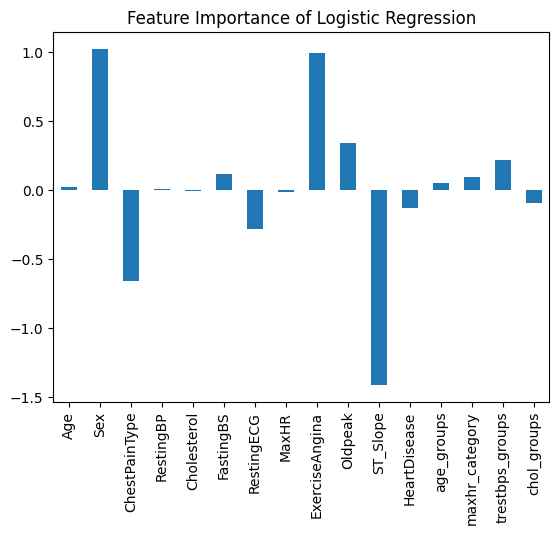

In [ ]:
# Visualize Feature Importance
feature_df = pd.DataFrame(feature_dict, index=[0])

feature_df.T.plot.bar(title='Feature Importance of Logistic Regression', legend=False);

In [ ]:
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,age_groups,maxhr_category,trestbps_groups,chol_groups,oldpeak_groups
0,40,1,1,140,289,0,1,172,0,0.0,2,0,1,1,2,2
1,49,0,2,160,180,0,1,156,0,1.0,1,0,1,2,1,2
2,37,1,1,130,283,0,2,98,0,0.0,2,0,0,1,2,2
3,48,0,0,138,214,0,1,108,1,1.5,1,0,0,4,0,0
4,54,1,2,150,195,0,1,122,0,0.0,2,0,0,2,1,2


In [ ]:
X.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'age_groups', 'maxhr_category', 'trestbps_groups', 'chol_groups',
       'oldpeak_groups'],
      dtype='object')

In [ ]:
def predict_Heart_Disease(Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS,
                          RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope):
    x = np.zeros(len(X.columns))

    x[0] = Age
    x[1] = Sex
    x[2] = ChestPainType
    x[3] = RestingBP
    x[4] = Cholesterol
    x[5] = FastingBS
    x[6] = RestingECG
    x[7] = MaxHR
    x[8] = ExerciseAngina
    x[9] = Oldpeak
    x[10] = ST_Slope

    return gs_log_reg.predict([x])[0]

In [ ]:
# Gọi hàm predict_Heart_Disease với 11 tham số
result = predict_Heart_Disease(50, 0, 2, 140, 290, 1, 0, 150, 1, 1.3, 1)

# In ra kết quả
print("Predicted Heart Disease:", result)

Predicted Heart Disease: 0


In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Định nghĩa các widgets
age_widget = widgets.IntSlider(min=0, max=120, value=50, description='Age:')
sex_widget = widgets.RadioButtons(options=[('Male', 1), ('Female', 0)], description='Sex:')
chest_pain_widget = widgets.Dropdown(options=[('Typical angina', 0), ('Atypical angina', 1), ('Non-anginal pain', 2), ('Asymptomatic', 3)], description='Chest Pain:')
resting_bp_widget = widgets.IntSlider(min=80, max=200, value=140, description='Resting BP:')
cholesterol_widget = widgets.IntSlider(min=100, max=600, value=290, description='Cholesterol:')
fasting_bs_widget = widgets.RadioButtons(options=[('Yes', 1), ('No', 0)], description='FastingBS:')
resting_ecg_widget = widgets.Dropdown(options=[('Normal', 0), ('ST', 1), ('LVH', 2)], description='Resting ECG:')
max_hr_widget = widgets.IntSlider(min=60, max=220, value=150, description='Max HR:')
exercise_angina_widget = widgets.RadioButtons(options=[('Yes', 1), ('No', 0)], description='Exercise Angina:')
oldpeak_widget = widgets.FloatSlider(min=0, max=10, step=0.1, value=1.3, description='Oldpeak:')
st_slope_widget = widgets.Dropdown(options=[('Up', 0), ('Flat', 1), ('Down', 2)], description='ST Slope:')

# Hàm được gọi khi nút "Predict" được nhấn
def on_predict_button_clicked(b):
    # Gọi hàm predict_Heart_Disease với giá trị từ widgets
    result = predict_Heart_Disease(age_widget.value, sex_widget.value, chest_pain_widget.value, resting_bp_widget.value, cholesterol_widget.value, fasting_bs_widget.value, resting_ecg_widget.value, max_hr_widget.value, exercise_angina_widget.value, oldpeak_widget.value, st_slope_widget.value)
    # In ra kết quả dự đoán
    print(f"Predicted Heart Disease: {'Yes' if result == 1 else 'No'}")

# Nút dự đoán
predict_button = widgets.Button(description="Predict")
predict_button.on_click(on_predict_button_clicked)

# Hiển thị tất cả widgets và nút
input_widgets = widgets.VBox([age_widget, sex_widget, chest_pain_widget, resting_bp_widget, cholesterol_widget, fasting_bs_widget, resting_ecg_widget, max_hr_widget, exercise_angina_widget, oldpeak_widget, st_slope_widget, predict_button])
display(input_widgets)

Predicted Heart Disease: Yes
